In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
from sklearn import metrics

In [48]:
from sklearn.linear_model import LinearRegression

In [49]:
df3=pd.read_csv(r"D:\Comsats\4th Semester\Business Data Analytics\project\presentation\Laptop\laptop_data_cleaned.csv")

In [50]:
df3

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [51]:
df2=df3[['Ram','Weight','Price','TouchScreen','Ips','Ppi','HDD','SSD']]
df2

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256
...,...,...,...,...,...,...,...,...
1268,4,2.20,10.555257,0,0,100.454670,500,0
1269,4,1.80,10.433899,1,1,157.350512,0,128
1270,16,1.30,11.288115,1,1,276.053530,0,512
1271,2,1.50,9.409283,0,0,111.935204,0,0


In [52]:
df2.corr()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
Ram,1.000000,0.389134,0.680519,0.113316,0.202809,0.294927,0.097340,0.599552
Weight,0.389134,1.000000,0.151386,-0.292288,0.023966,-0.319499,0.510876,-0.056985
Price,0.680519,0.151386,1.000000,0.194289,0.279240,0.480687,-0.097361,0.658808
TouchScreen,0.113316,-0.292288,0.194289,1.000000,0.136973,0.452107,-0.205105,0.252142
Ips,0.202809,0.023966,0.279240,0.136973,1.000000,0.288833,-0.090411,0.215197
Ppi,0.294927,-0.319499,0.480687,0.452107,0.288833,1.000000,-0.290774,0.499899
HDD,0.097340,0.510876,-0.097361,-0.205105,-0.090411,-0.290774,1.000000,-0.400625
SSD,0.599552,-0.056985,0.658808,0.252142,0.215197,0.499899,-0.400625,1.000000


<Axes: >

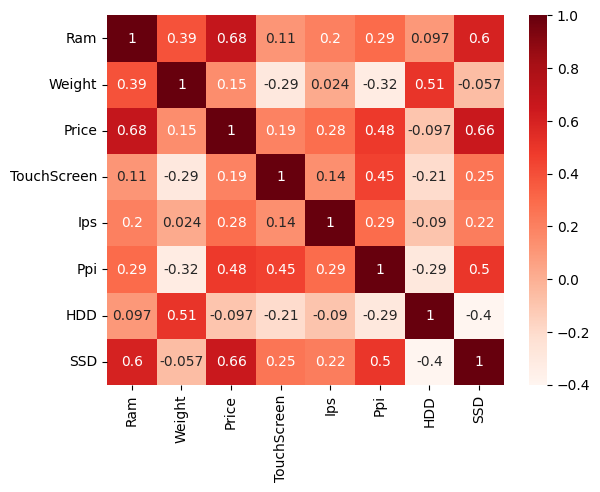

In [53]:
sns.heatmap(df2.corr(),annot=True,cmap='Reds')

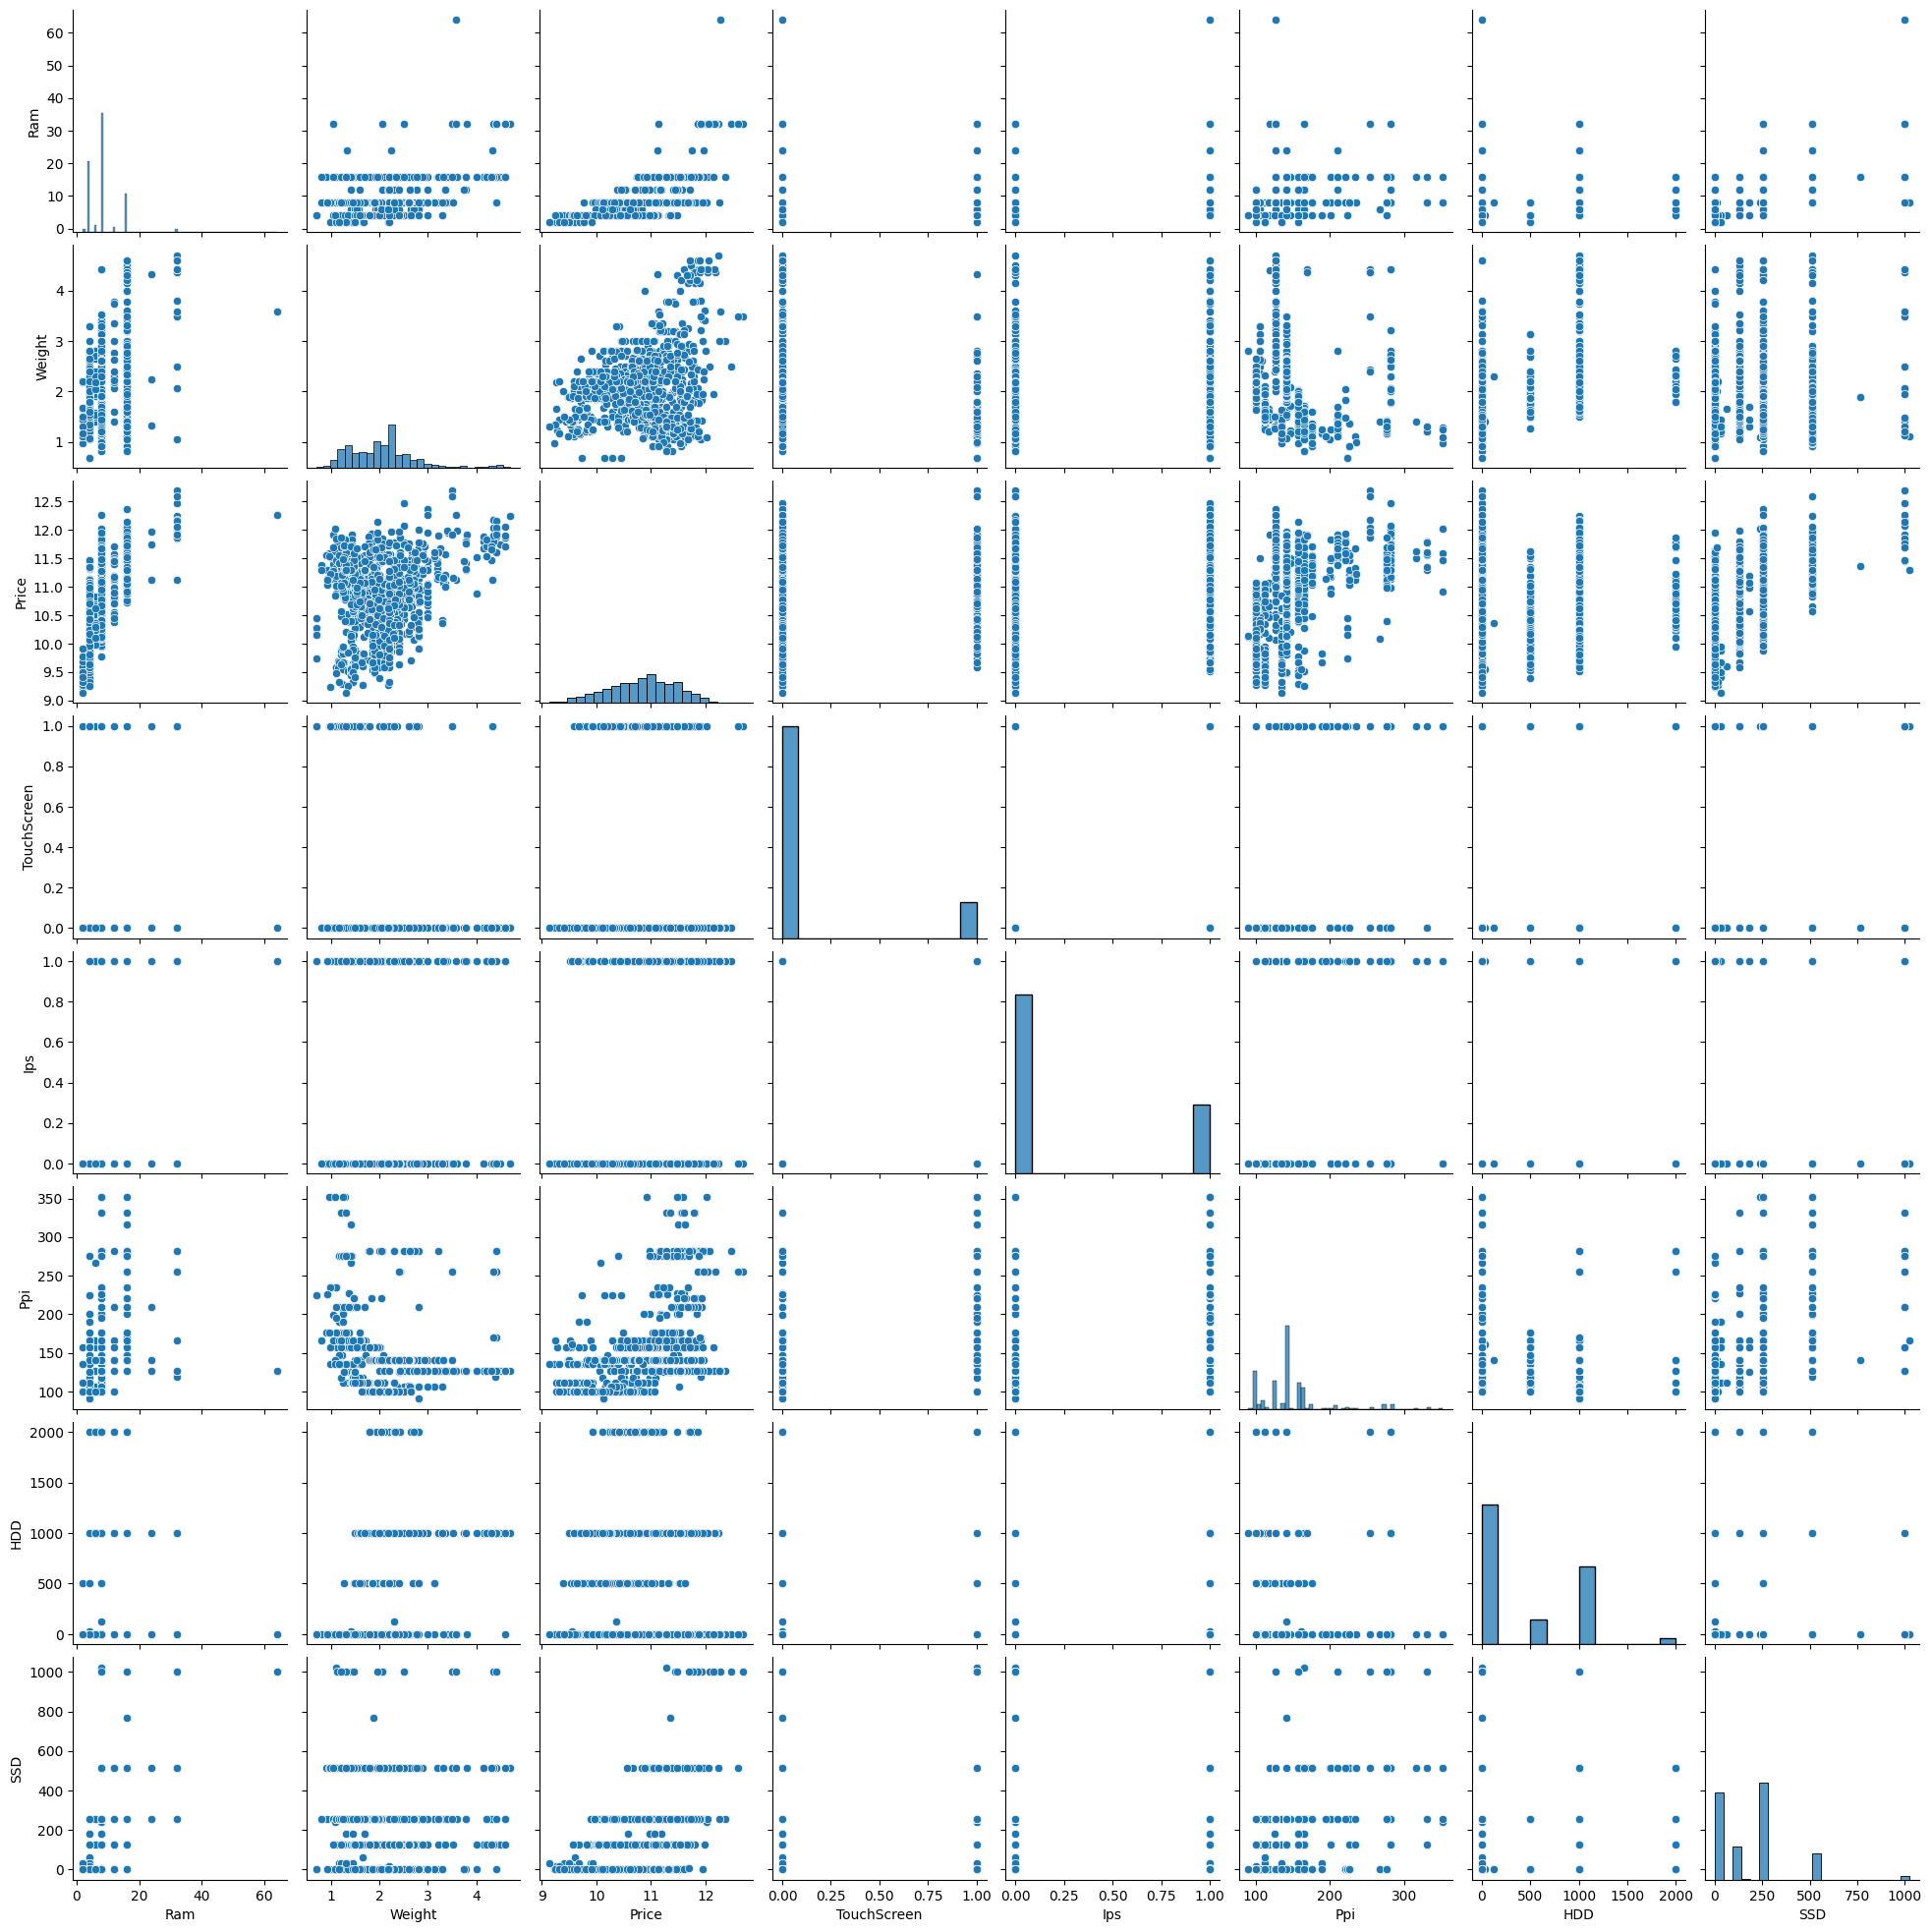

In [54]:
sns.pairplot(df3)

In [55]:
X=df3.drop('TypeName',axis=1)

In [56]:
X.shape

(1273, 12)

In [57]:
y=df3['Price']

In [58]:
y.shape

(1273,)

In [59]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [60]:
X_train.shape

(891, 12)

In [61]:
X_test.shape

(382, 12)

In [62]:
model=LinearRegression()

In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the dataset
data = df2

# Convert data to DataFrame
df = pd.DataFrame(data)

# Step 2: Check if the DataFrame is empty
if df.empty:
    raise ValueError("The dataset is empty!")

# Step 3: Inspect the columns to identify features and Price
print("Columns in dataset:", df.columns)

# Check if 'Price' column exists
if 'Price' not in df.columns:
    raise ValueError("The 'Price' column is missing from the dataset!")

# Step 4: Handle missing values (drop or fill)
# Here, we'll drop rows with missing values. You can choose to fill them instead, depending on your requirement.
df = df.dropna()  # This drops rows with missing values

# Step 5: Select features and Price
# Assuming the first two columns are the features, but you can modify this based on your dataset structure
# Here, I will assume all columns except 'Price' are features
X = df.drop(columns=['Price'])  # Features (input variables)
y = df['Price']  # Price (output variable)

# Step 6: Check if features or Price are empty
if X.shape[0] == 0 or y.shape[0] == 0:
    raise ValueError("No samples found in the dataset!")

# Step 7: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Check if the training set has samples
if X_train.shape[0] == 0 or y_train.shape[0] == 0:
    raise ValueError("Training set is empty!")

# Step 9: Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 10: Make predictions on the test set
y_pred = model.predict(X_test)

# Step 11: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Output the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Optionally, print the coefficients
print("Model coefficients:", model.coef_)


Columns in dataset: Index(['Ram', 'Weight', 'Price', 'TouchScreen', 'Ips', 'Ppi', 'HDD', 'SSD'], dtype='object')
Mean Squared Error: 0.14242417521742107
R-squared: 0.6404552517451376
Model coefficients: [ 4.29453747e-02  8.31901266e-02 -2.54017690e-02  9.23581622e-02
  3.38223189e-03  1.33510808e-05  1.02381138e-03]


In [64]:
df.columns = df.columns.str.strip()


In [65]:
# Check first few rows of the dataset
print(X_train.head())
print(Y_train.head())

# Check data types of columns
print(X_train.dtypes)
print(Y_train.dtypes)
# Identify problematic rows in X_train
non_numeric_rows = X_train[~X_train.applymap(lambda x: isinstance(x, (int, float))).all(1)]
print("Non-numeric rows in X_train:")
print(non_numeric_rows)
# Drop rows with non-numeric values in X_train
X_train = X_train.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric to NaN
X_train = X_train.dropna()  # Remove rows with NaN

# Ensure Y_train matches X_train after dropping rows
Y_train = Y_train.loc[X_train.index]
from sklearn.preprocessing import LabelEncoder

# Encode all object-type columns
label_encoders = {}
for column in X_train.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_train[column] = le.fit_transform(X_train[column].astype(str))
    label_encoders[column] = le


     Ram  Weight  TouchScreen  Ips         Ppi  HDD  SSD
490    8    2.30            0    1  141.211998    0  256
405    8    1.10            0    0  157.350512    0  512
156    4    1.74            1    1  157.350512    0  256
650   32    3.80            0    1  127.335675    0  512
770   16    2.30            0    0  141.211998    0  256
567    10.580859
545    10.534468
644    10.084809
909    11.524644
802    11.288115
Name: Price, dtype: float64
Ram              int64
Weight         float64
TouchScreen      int64
Ips              int64
Ppi            float64
HDD              int64
SSD              int64
dtype: object
float64
Non-numeric rows in X_train:
Empty DataFrame
Columns: [Ram, Weight, TouchScreen, Ips, Ppi, HDD, SSD]
Index: []


C:\Users\Abdur Rehman\AppData\Local\Temp\ipykernel_3032\433289048.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  non_numeric_rows = X_train[~X_train.applymap(lambda x: isinstance(x, (int, float))).all(1)]


KeyError: '[490, 405, 156, 650, 770, 1003, 275, 394, 1258, 575, 614, 826, 277, 327, 1186, 1052, 624, 581, 570, 922, 178, 427, 964, 377, 381, 861, 88, 671, 836, 1266, 481, 943, 1006, 285, 1205, 352, 266, 59, 979, 965, 732, 615, 1146, 573, 820, 678, 451, 731, 420, 380, 83, 129, 916, 774, 1065, 522, 260, 596, 818, 988, 906, 138, 292, 1035, 376, 141, 609, 838, 1156, 139, 911, 973, 224, 398, 274, 323, 342, 807, 1078, 718, 969, 447, 634, 344, 1040, 1005, 843, 549, 1112, 526, 365, 855, 701, 321, 803, 707, 944, 613, 39, 30, 242, 1110, 136, 310, 1066, 503, 780, 1122, 1264, 453, 3, 111, 670, 1097, 482, 921, 931, 1139, 429, 314, 1030, 319, 579, 630, 5, 100, 710] not in index'

In [22]:
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [40]:
model.coef_

array([ 4.29453747e-02,  8.31901266e-02, -2.54017690e-02,  9.23581622e-02,
        3.38223189e-03,  1.33510808e-05,  1.02381138e-03])

In [41]:
y_pred=model.predict(X_test)
y_pred

array([10.77392967, 10.86634214, 11.2265993 , 11.20492921, 10.95298984,
       10.99504578, 10.2622218 , 10.43282688, 10.83633341, 11.49279839,
       10.84465242, 10.89129918, 10.78963645, 10.71549002, 11.20332215,
       11.43703582, 10.893602  , 10.46327978, 11.26644924, 11.20742491,
       10.22554364, 10.94571117, 10.74333713, 11.20415405, 10.27998159,
       11.42207256, 10.6212464 , 10.84138511, 10.83008011, 10.97284263,
       10.86229548, 10.8670506 , 10.49205613, 10.61795946, 10.91222667,
       10.95343457, 10.71550228, 10.90465026, 11.27182778, 10.27833812,
       10.41783233, 11.22362358, 10.86295425, 10.82340457, 10.27998159,
       10.92708806, 11.22988625, 10.27665399, 10.93762844, 10.96533033,
       10.90296127, 11.07492542, 10.97066821, 10.36402821, 10.30561108,
       10.72192358, 10.66222934, 10.42450787, 10.95298984, 13.111417  ,
       11.96135025, 10.85469553, 11.20721127, 10.33223192, 10.78677165,
       10.85335301, 10.35735267, 10.43447035, 10.60460838, 10.76

In [24]:
MAE=metrics.mean_absolute_error(y_test,y_pred)

In [25]:
MAE

0.30966888280754146

In [26]:
MSE=metrics.mean_squared_error(y_test,y_pred)
MSE

0.14242417521742107

In [27]:
RMSE=np.sqrt(MSE)
RMSE

0.37739127602187766

In [28]:
test_residual=y_test-y_pred
test_residual

43     -0.273339
1160    0.421772
128    -0.009672
1232    0.147140
1193    0.111814
          ...   
96     -0.232284
184     0.139891
788     0.293718
970    -0.283505
163    -0.354880
Name: Price, Length: 255, dtype: float64

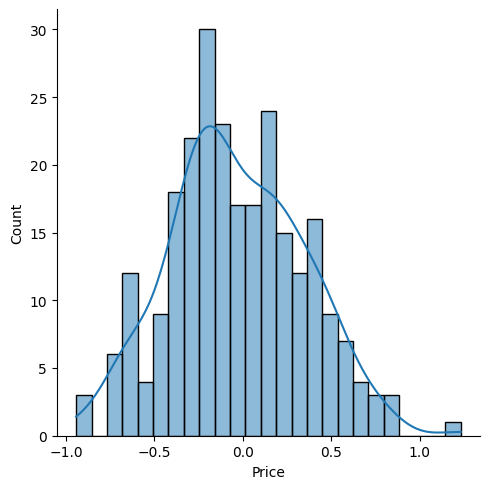

In [ ]:
sns.displot(test_residual,bins=25,kde=True)

<Axes: ylabel='Price'>

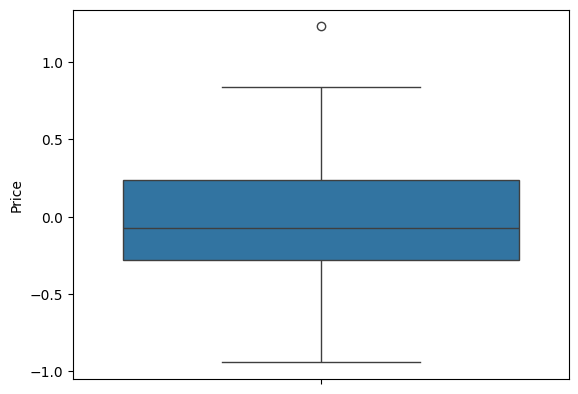

In [34]:
sns.boxplot(test_residual)

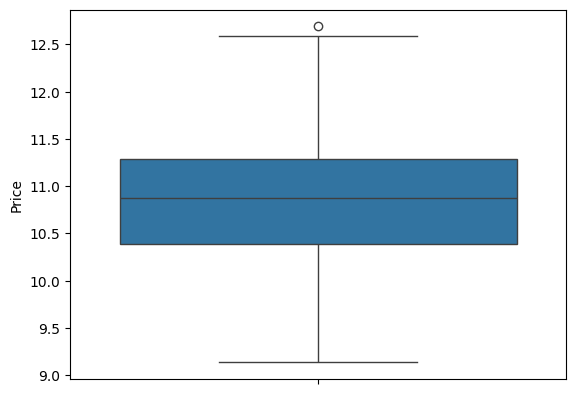

In [ ]:
sns.boxplot(df['Price'])
plt.show()

In [48]:
df.head()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
0,8,1.37,11.175755,0,1,226.983005,0,128
1,8,1.34,10.776777,0,0,127.677940,0,0
2,8,1.86,10.329931,0,0,141.211998,0,256
3,16,1.83,11.814476,0,1,220.534624,0,512
4,8,1.37,11.473101,0,1,226.983005,0,256


In [114]:
df2.tail()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
1268,4,2.20,10.555257,0,0,100.454670,500,0
1269,4,1.80,10.433899,1,1,157.350512,0,128
1270,16,1.30,11.288115,1,1,276.053530,0,512
1271,2,1.50,9.409283,0,0,111.935204,0,0
1272,6,2.19,10.614129,0,0,100.454670,1000,0


In [49]:
df2.shape

(1273, 8)

In [50]:
df2.isnull().sum()

Ram            0
Weight         0
Price          0
TouchScreen    0
Ips            0
Ppi            0
HDD            0
SSD            0
dtype: int64

In [51]:
df2.duplicated().sum()

6

In [52]:
df2.dtypes

Ram              int64
Weight         float64
Price          float64
TouchScreen      int64
Ips              int64
Ppi            float64
HDD              int64
SSD              int64
dtype: object

In [53]:
df2.describe()

,Ram,Weight,Price,TouchScreen,Ips,Ppi,HDD,SSD
count,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000,1273.000000
mean,8.447761,2.041100,10.828218,0.146897,0.279654,146.950812,413.715632,186.252946
std,5.098771,0.669241,0.619565,0.354142,0.449006,42.926775,518.054486,186.531571
min,2.000000,0.690000,9.134616,0.000000,0.000000,90.583402,0.000000,0.000000
25%,4.000000,1.500000,10.387379,0.000000,0.000000,127.335675,0.000000,0.000000
50%,8.000000,2.040000,10.872255,0.000000,0.000000,141.211998,0.000000,256.000000
75%,8.000000,2.310000,11.287447,0.000000,1.000000,157.350512,1000.000000,256.000000
max,64.000000,4.700000,12.691441,1.000000,1.000000,352.465147,2000.000000,1024.000000


In [54]:
df2.nunique()

Ram              9
Weight         171
Price          791
TouchScreen      2
Ips              2
Ppi             39
HDD              6
SSD             13
dtype: int64

<Axes: xlabel='Price', ylabel='SSD'>

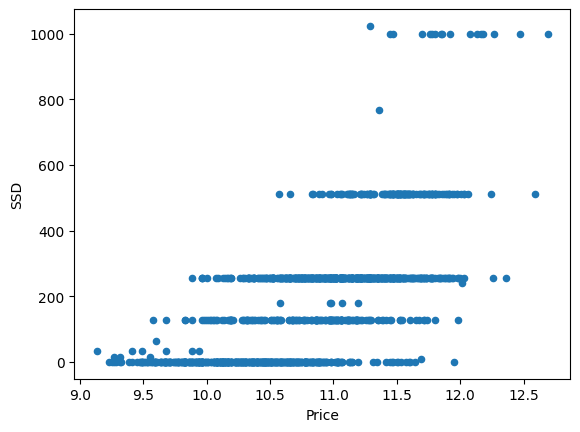

In [55]:

df2.plot(x='Price', y='SSD', kind='scatter')

<Axes: xlabel='Ips', ylabel='Price'>

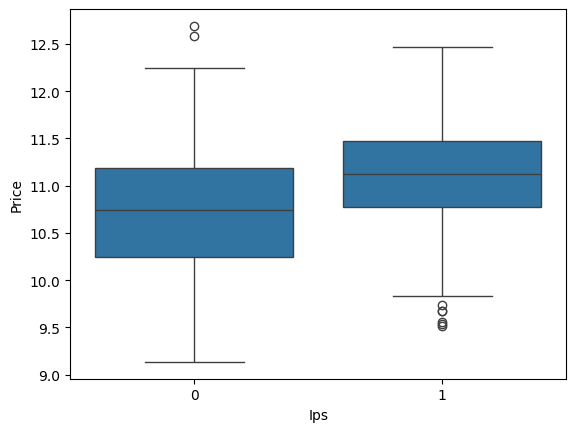

In [56]:
sns.boxplot(x='Ips', y='Price', data=df2)


In [57]:
df3.head()

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [58]:
outlier_salaries = df3[(df3['Company'] == 'HP') & (df3['Price'] > 8.0)]
outlier_salaries

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
10,HP,Notebook,4,1.86,9.951658,0,0,100.454670,Intel Core i5,500,0,Intel,Others
11,HP,Notebook,4,1.86,9.819076,0,0,141.211998,Intel Core i3,500,0,Intel,Others
22,HP,Notebook,4,1.86,9.528521,0,0,100.454670,AMD Processor,500,0,AMD,Others
24,HP,Ultrabook,8,1.91,10.466285,0,0,141.211998,Intel Core i7,0,256,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1243,HP,Notebook,4,1.54,10.978617,0,0,157.350512,Intel Core i5,0,256,Intel,Windows
1250,HP,Notebook,4,1.86,9.964522,0,0,100.454670,AMD Processor,500,0,AMD,Windows
1265,HP,Notebook,6,2.04,10.285461,0,0,141.211998,AMD Processor,0,0,AMD,Windows
1267,HP,Netbook,2,1.17,9.317895,0,0,135.094211,Other Intel Processor,0,0,Intel,Windows


In [59]:
mean_of_Companies = df3.groupby('Company')['Price'].mean()
mean_of_Companies

Company
Acer         10.301821
Apple        11.274645
Asus         10.797073
Chuwi         9.683992
Dell         10.924479
Fujitsu      10.563592
Google       11.374981
HP           10.805129
Huawei       11.235397
LG           11.621737
Lenovo       10.779085
MSI          11.383340
Mediacom      9.645522
Microsoft    11.305010
Razer        11.940528
Samsung      11.173723
Toshiba      11.044669
Vero          9.351166
Xiaomi       10.995970
Name: Price, dtype: float64

In [60]:
df.drop([438,603],inplace=True)

In [61]:
df3['TypeName'].unique()

array(['Ultrabook', 'Notebook', 'Netbook', 'Gaming', '2 in 1 Convertible',
       'Workstation'], dtype=object)

In [62]:
df3['TypeName'].value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

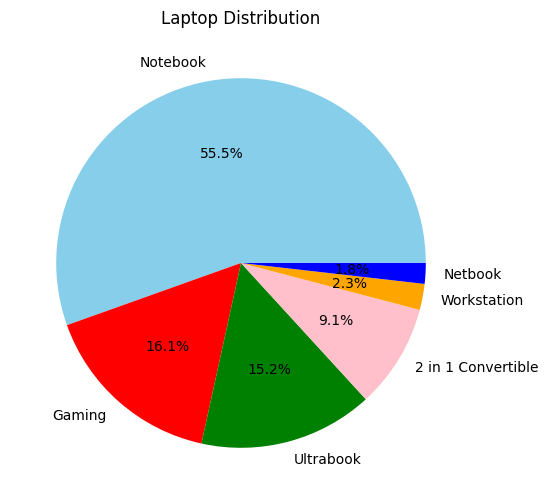

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

colors = ['skyblue', 'red','Green','pink','orange','blue','purple']
label=df3['TypeName'].value_counts().index  
sizes = df3['TypeName'].value_counts()


plt.pie(sizes,labels=label,colors=colors,autopct='%1.1f%%')  
plt.title('Laptop Distribution')
plt.show()

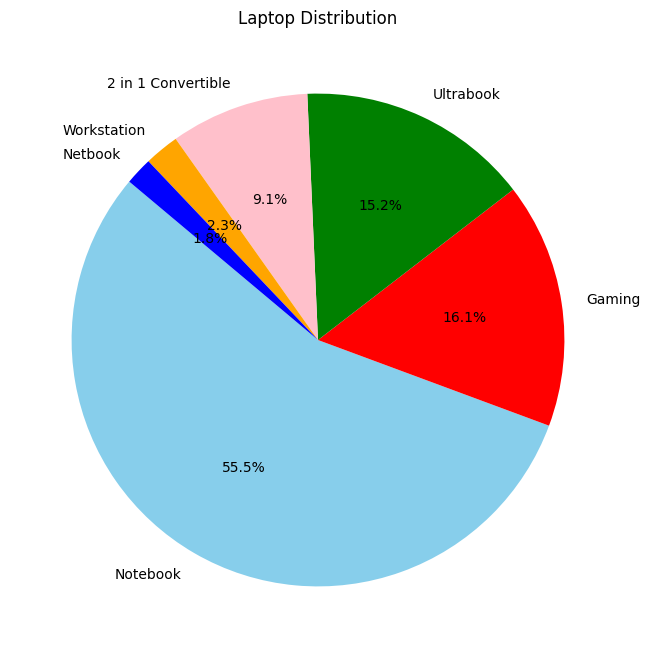

In [46]:
import matplotlib.pyplot as plt

# Ensure figure size is reasonable
plt.figure(figsize=(10, 8))

# Define colors and extract counts and labels
colors = ['skyblue', 'red', 'green', 'pink', 'orange', 'blue', 'purple']
labels = df3['TypeName'].value_counts().index  # Unique values as labels
sizes = df3['TypeName'].value_counts().values  # Count of each unique value

# Plot the pie chart
plt.pie(
    sizes, 
    labels=labels,  # Attach labels
    colors=colors[:len(labels)],  # Limit colors to the number of labels
    autopct='%1.1f%%',  # Show percentages
    startangle=140
)

# Add a title
plt.title('Laptop Distribution')
plt.show()

<Axes: xlabel='Price', ylabel='Company'>

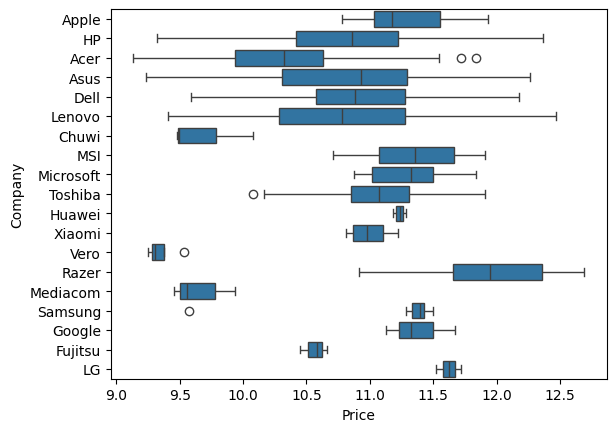

In [ ]:
sns.boxplot(x='Price', y='Company', data=df3)

In [153]:
df3.groupby('Company')['Price'].mean()

Company
Acer         10.301821
Apple        11.274645
Asus         10.797073
Chuwi         9.683992
Dell         10.924479
Fujitsu      10.563592
Google       11.374981
HP           10.805129
Huawei       11.235397
LG           11.621737
Lenovo       10.779085
MSI          11.383340
Mediacom      9.645522
Microsoft    11.305010
Razer        11.940528
Samsung      11.173723
Toshiba      11.044669
Vero          9.351166
Xiaomi       10.995970
Name: Price, dtype: float64

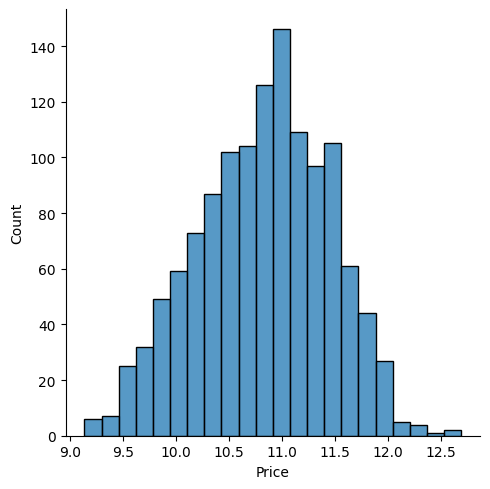

In [154]:
sns.displot(df['Price'])

<Axes: xlabel='Price', ylabel='Company'>

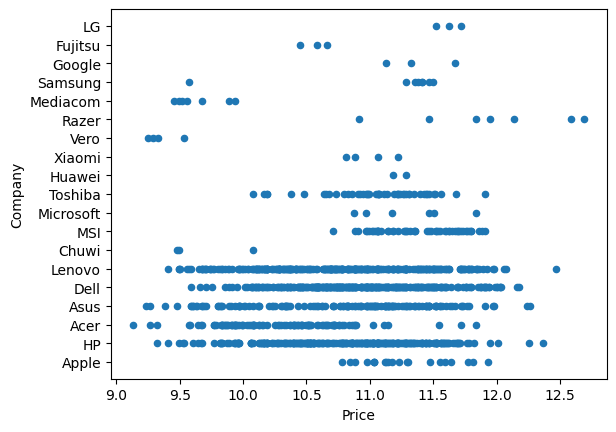

In [ ]:
df3.plot(x='Price', y='Company', kind='scatter')

In [157]:
df3.Company.value_counts()

Company
Dell         291
Lenovo       289
HP           268
Asus         151
Acer         101
MSI           54
Toshiba       48
Apple         21
Samsung        8
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: count, dtype: int64

<Axes: xlabel='HDD', ylabel='Price'>

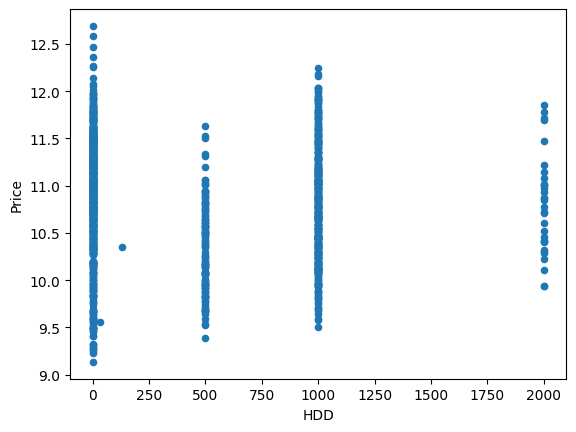

In [ ]:
df.plot(x='HDD', y='Price', kind='scatter')

In [162]:
df3.TypeName.value_counts()

TypeName
Notebook              706
Gaming                205
Ultrabook             194
2 in 1 Convertible    116
Workstation            29
Netbook                23
Name: count, dtype: int64

In [163]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import  LinearRegression


In [165]:
df3.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'TouchScreen', 'Ips',
       'Ppi', 'Cpu_brand', 'HDD', 'SSD', 'Gpu_brand', 'Os'],
      dtype='object')

In [16]:
X = df2[['Ram','Weight','TouchScreen','Ips','Ppi','HDD','SSD']]
y = df2[['Price']]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [18]:
model = LinearRegression()

In [19]:
df3

,Company,TypeName,Ram,Weight,Price,TouchScreen,Ips,Ppi,Cpu_brand,HDD,SSD,Gpu_brand,Os
0,Apple,Ultrabook,8,1.37,11.175755,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,10.776777,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,10.329931,0,0,141.211998,Intel Core i5,0,256,Intel,Others
3,Apple,Ultrabook,16,1.83,11.814476,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,11.473101,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268,Asus,Notebook,4,2.20,10.555257,0,0,100.454670,Intel Core i7,500,0,Nvidia,Windows
1269,Lenovo,2 in 1 Convertible,4,1.80,10.433899,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1270,Lenovo,2 in 1 Convertible,16,1.30,11.288115,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1271,Lenovo,Notebook,2,1.50,9.409283,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows


In [20]:
model.fit(X_train,y_train)

LinearRegression()

In [21]:
y_predicted = model.predict(X_test)

In [22]:
from sklearn.metrics import  mean_squared_error,r2_score

In [23]:
MSE = mean_squared_error(y_test,y_predicted)
print(f"The mean square error of model is {MSE}")
print(f"The root mean square error of model is {np.sqrt(MSE)}")

The mean square error of model is 0.17948341956271419
The root mean square error of model is 0.42365483540579846


In [24]:
performance=r2_score(y_test,y_predicted)
print(f"The r_2 score of the model is {performance}")

The r_2 score of the model is 0.5495766761766044


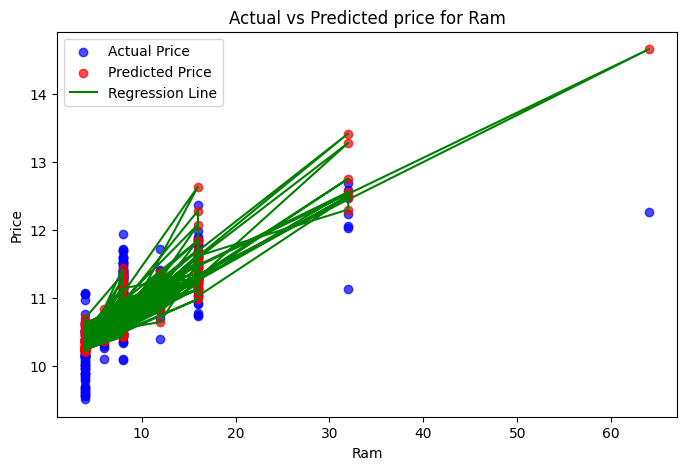

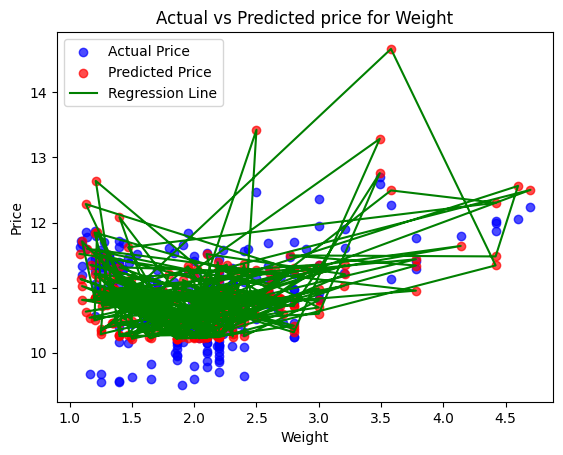

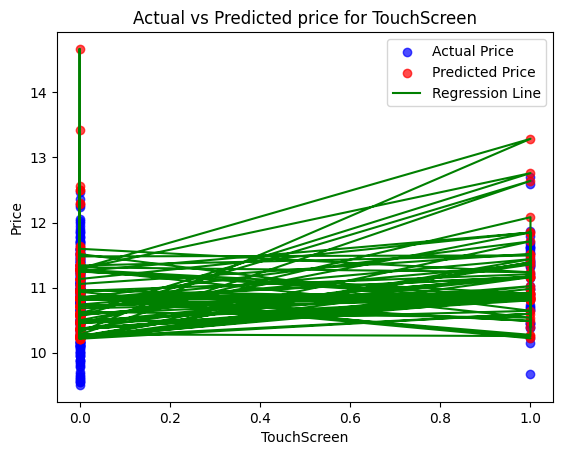

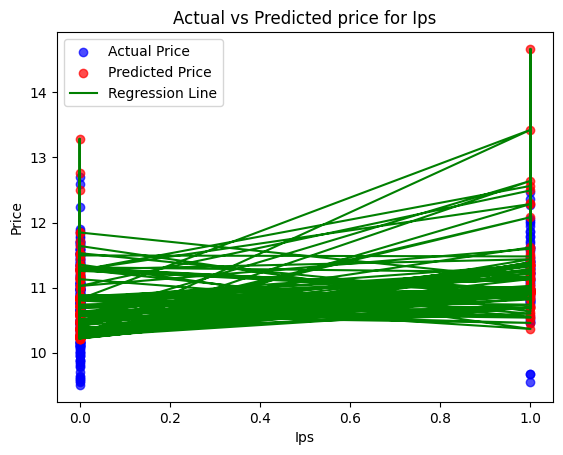

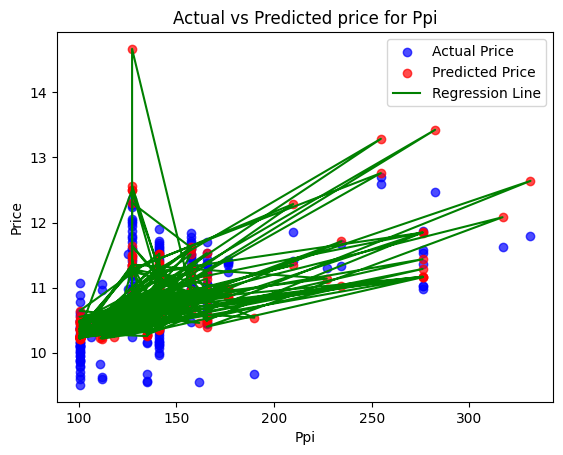

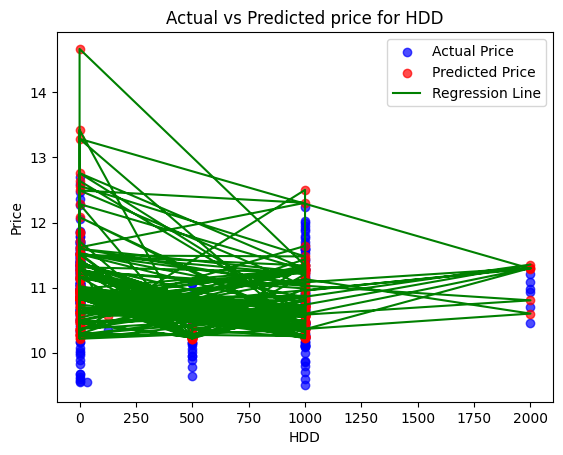

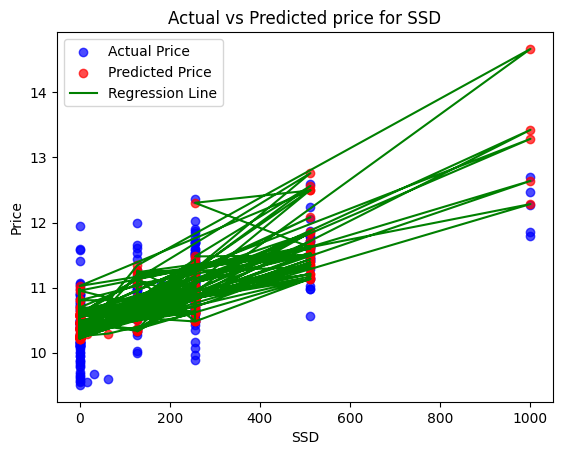

In [26]:
plt.figure(figsize=(8, 5))

# Plotting each feature in X_test against y_test and y_predicted
for i, feature in enumerate(X_test.columns):
	plt.scatter(X_test[feature], y_test, color='blue', label='Actual Price', alpha=0.7)
	plt.scatter(X_test[feature], y_predicted, color='red', label='Predicted Price', alpha=0.7)
	plt.plot(X_test[feature], y_predicted, color='green', label='Regression Line')
	plt.title(f'Actual vs Predicted price for {feature}')
	plt.xlabel(feature)
	plt.ylabel('Price')
	plt.legend()
	plt.show()

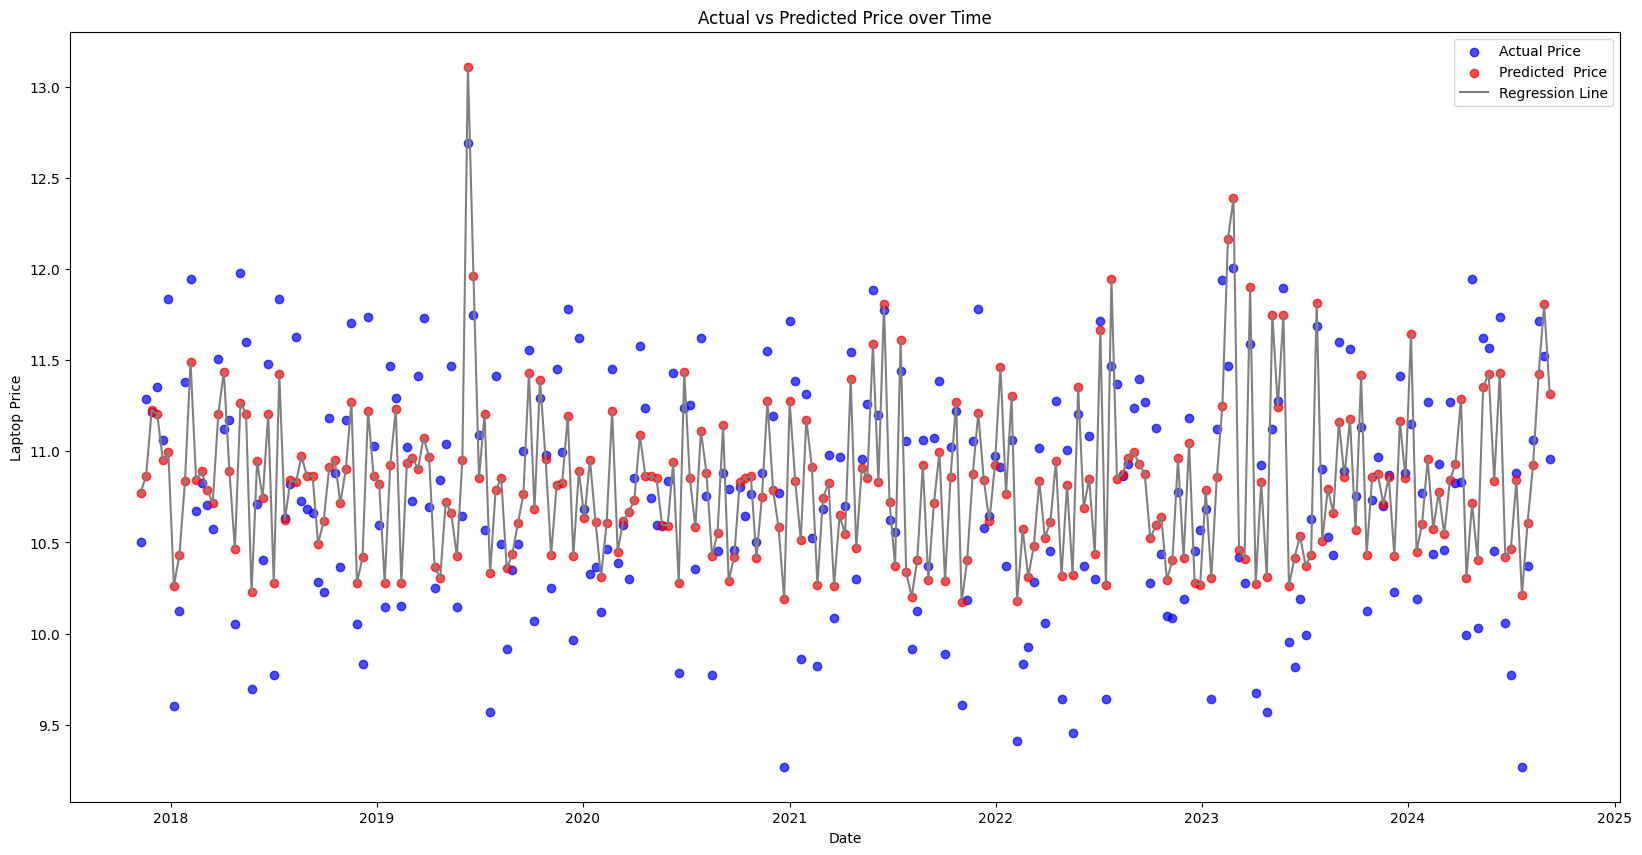

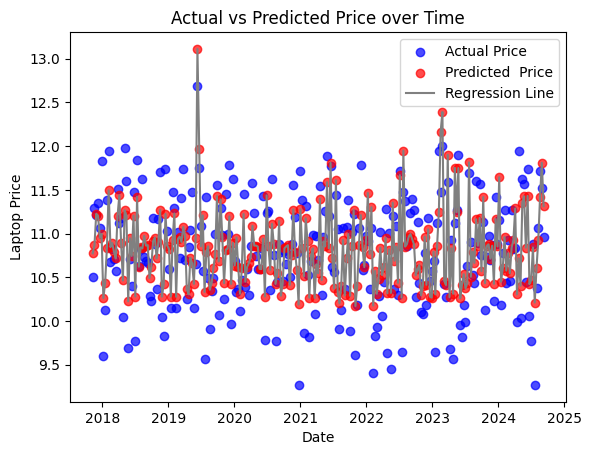

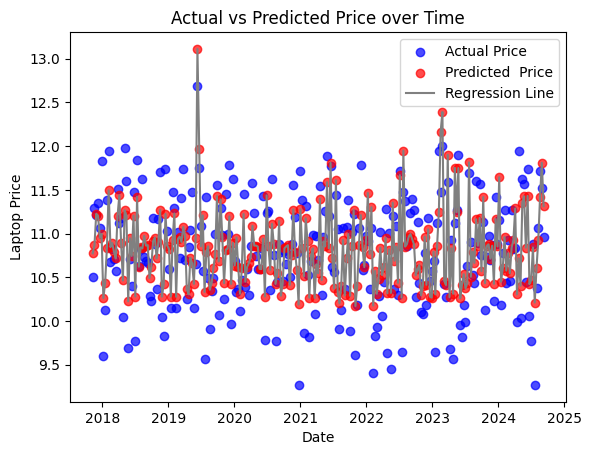

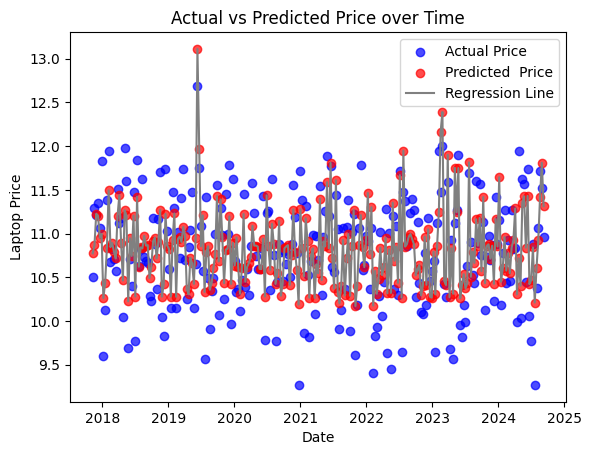

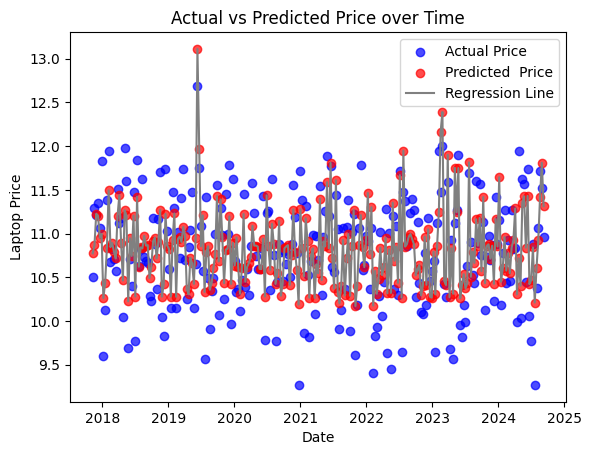

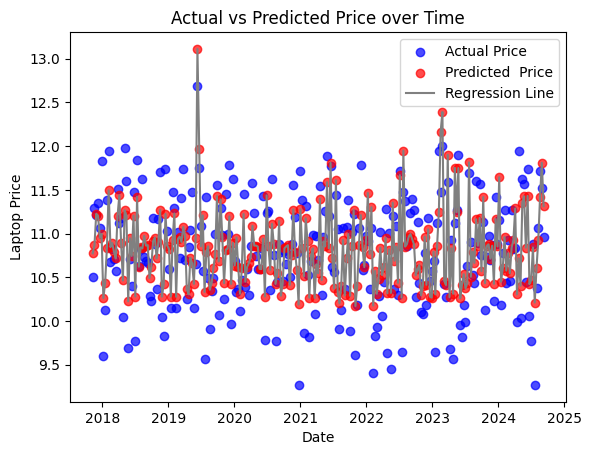

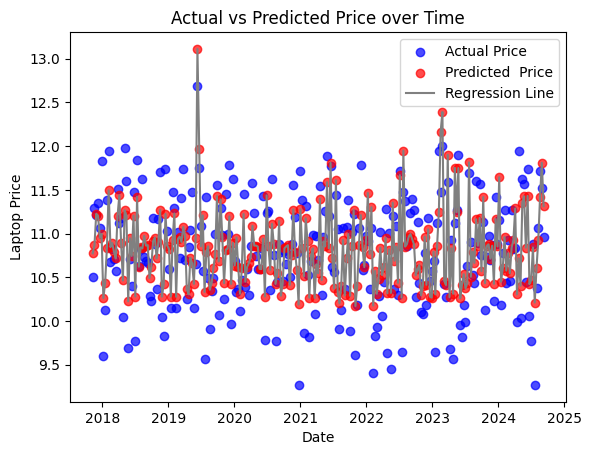

In [40]:
# Assuming your X_test includes the 'Date' column and is indexed correctly
dates = pd.date_range(start='2017-11-09', end='2024-09-08', periods=len(X_test))

plt.figure(figsize=(20, 10))

for i, feature in enumerate(X_test.columns):
    if feature != 'Date':  # Exclude 'Date' column from feature-wise plotting
        plt.scatter(dates, y_test, color='blue', label='Actual Price', alpha=0.7)
        plt.scatter(dates, y_pred, color='red', label='Predicted  Price', alpha=0.7)
        plt.plot(dates, y_pred, color='grey', label='Regression Line')
        plt.title(f'Actual vs Predicted Price over Time')
        plt.xlabel('Date')
        plt.ylabel('Laptop Price')
        plt.legend()
        plt.show()